# Data Preparation

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the temperature data
temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [ ]:
#Inspecting the top 5 rows of the data
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
# Converting data  column to date format
temp['date'] = pd.to_datetime(temp['dt'])

In [ ]:
# Extracting year from data
temp['year'] = temp['date'].dt.year
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,date,year
0,1743-11-01,4.384,2.294,Åland,1743-11-01,1743
1,1743-12-01,NaN,NaN,Åland,1743-12-01,1743
2,1744-01-01,NaN,NaN,Åland,1744-01-01,1744
3,1744-02-01,NaN,NaN,Åland,1744-02-01,1744
4,1744-03-01,NaN,NaN,Åland,1744-03-01,1744


In [ ]:
# Checking for null values
temp.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
date                                 0
year                                 0
dtype: int64

In [ ]:
# Removing null values
data = temp.dropna()
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,date,year
0,1743-11-01,4.384,2.294,Åland,1743-11-01,1743
5,1744-04-01,1.530,4.680,Åland,1744-04-01,1744
6,1744-05-01,6.702,1.789,Åland,1744-05-01,1744
7,1744-06-01,11.609,1.577,Åland,1744-06-01,1744
8,1744-07-01,15.342,1.410,Åland,1744-07-01,1744


In [ ]:
# creating a new dataframe with only required columns
df = data[['year', 'AverageTemperature', 'Country']]
df.head()

,year,AverageTemperature,Country
0,1743,4.384,Åland
5,1744,1.530,Åland
6,1744,6.702,Åland
7,1744,11.609,Åland
8,1744,15.342,Åland


In [ ]:
# Getting the data with records that are from 1970
df1 = df[df['year']>1969]
final_df = df1.groupby(['year', 'Country'])['AverageTemperature'].agg(['mean','median', 'max', 'min', 'var']).reset_index()
final_df

,year,Country,mean,median,max,min,var
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117
1,1970,Africa,24.321583,25.0370,25.910,20.988,2.772779
2,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893
3,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106
4,1970,American Samoa,26.760667,26.8540,27.678,25.896,0.406978
...,...,...,...,...,...,...,...
10643,2013,Western Sahara,23.744250,24.2745,28.564,17.461,16.122841
10644,2013,Yemen,28.129750,30.0215,32.325,21.567,16.993068
10645,2013,Zambia,21.196000,21.2985,23.636,18.266,4.310316
10646,2013,Zimbabwe,20.710750,20.4505,24.075,17.000,7.778317


### CO2 emission

In [ ]:
# Creating a total co2 emission data frame
co2 = pd.read_excel('ghg.xls', sheet_name = 'fossil_CO2_totals_by_country')
co2_pivot = pd.melt(co2, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018,      2019,      2020], var_name = 'year', value_name = 'emission')
co2_data =  pd.merge(final_df, co2_pivot, on = ['Country', 'year'], how="inner")
co2_data = co2_data.rename(columns = {'mean':'mean_temp','min':'min_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
co2_data.head()

,year,Country,mean_temp,median_temp,max_temp,min_temp,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,1.718206
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,4.813550
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,18.931573
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,8.952568
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.002168


In [ ]:
# Exporting to csv file of above dataframe
co2_data.to_csv('co2_emission.csv')

### Co2 emission per sector

In [ ]:
# Creating a co2 emission per sector data frame
co2_by_sec = pd.read_excel('ghg.xls', sheet_name = 'fossil_CO2_by_sector_and_countr')
co2_by_sec =pd.melt(co2_by_sec, id_vars = ['Sector','Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018,      2019,      2020], var_name = 'year', value_name = 'emission')
co2_by_sector_df = pd.merge(final_df, co2_by_sec, on = ['Country', 'year'], how="inner")
co2_by_sector_df = co2_by_sector_df.rename(columns = {'mean':'mean_temp', 'min':'min_temp','median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
co2_by_sector_df.head()

,year,Country,mean_temp,median_temp,max_temp,min_temp,variance_temp,Sector,emission
0,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Power Industry,0.055674
1,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Buildings,0.789134
2,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Transport,0.228480
3,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other industrial combustion,0.102457
4,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other sectors,0.542460


In [ ]:
# Exporting to csv file of above dataframe
co2_by_sector_df.to_csv('co2_emission_per_sector.csv')

### Co2_emission_per_captia

In [ ]:
# Creating a total co2 emission per captia data frame
co2_per_captia = pd.read_excel('ghg.xls', sheet_name = 'fossil_CO2_per_capita_by_countr')
co2_by_captia =pd.melt(co2_per_captia, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018,      2019,      2020], var_name = 'year', value_name = 'emission')
co2_per_captia_df = pd.merge(final_df, co2_by_captia, on = ['Country', 'year'], how="inner")
co2_per_captia_df = co2_per_captia_df.rename(columns = {'mean':'mean_temp', 'min':'min_temp','median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
co2_per_captia_df.head()

,year,Country,mean_temp,median_temp,max_temp,min_temp,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,0.154430
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,2.238236
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,1.301139
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,1.321143
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.338637


In [ ]:
# Exporting to csv file of above dataframe
co2_per_captia_df.to_csv('co2_emission_per_captia.csv')

### Total Green House Gas Emissions per Country

In [ ]:
# Creating a total ghg emission data frame
ghg_total = pd.read_excel('ghg.xls', sheet_name = 'GHG_totals_by_country')
ghg_total =pd.melt(ghg_total, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018], var_name = 'year', value_name = 'emission')
ghg_total_df = pd.merge(final_df, ghg_total, on = ['Country', 'year'], how="inner")
ghg_total_df = ghg_total_df.rename(columns = {'mean':'mean_temp','min':'min_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
ghg_total_df.head()

,year,Country,mean_temp,median_temp,max_temp,min_temp,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,16.269661
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,7.942808
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,51.542009
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,18.985437
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.004399


In [ ]:
# Exporting to csv file of above dataframe
ghg_total_df.to_csv('ghg_emissions.csv')

### Green House Gas Emission Per Sector

In [ ]:
# Creating a total ghd emission per sector data frame
ghg_per_sec = pd.read_excel('ghg.xls', sheet_name = 'GHG_by_sector_and_country')
ghg_per_sec =pd.melt(ghg_per_sec, id_vars = ['Sector', 'Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018], var_name = 'year', value_name = 'emission')
ghg_per_sec_df = pd.merge(final_df, ghg_per_sec, on = ['Country', 'year'], how="inner")
ghg_per_sec_df = ghg_per_sec_df.rename(columns = {'mean':'mean_temp','min':'min_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
ghg_per_sec_df.head()

,year,Country,mean_temp,median_temp,max_temp,min_temp,variance_temp,Sector,emission
0,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Power Industry,0.055825
1,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Buildings,0.816874
2,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Transport,0.234186
3,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other industrial combustion,0.102993
4,1970,Afghanistan,14.783083,15.471,26.862,1.337,88.552117,Other sectors,15.059782


In [ ]:
# Exporting to csv file of above dataframe
ghg_per_sec_df.to_csv('ghg_emission_per_sector.csv')

### Green House Gas Emission per Captia

In [ ]:
# Creating a total ghg emission per captia data frame
ghg_per_captia = pd.read_excel('ghg.xls', sheet_name = 'GHG_per_capita_by_country')
ghg_per_captia = pd.melt(ghg_per_captia, id_vars = ['Country'], value_vars = [1970,      1971,      1972,      1973,      1974,
            1975,      1976,      1977,      1978,      1979,      1980,
            1981,      1982,      1983,      1984,      1985,      1986,
            1987,      1988,      1989,      1990,      1991,      1992,
            1993,      1994,      1995,      1996,      1997,      1998,
            1999,      2000,      2001,      2002,      2003,      2004,
            2005,      2006,      2007,      2008,      2009,      2010,
            2011,      2012,      2013,      2014,      2015,      2016,
            2017,      2018], var_name = 'year', value_name = 'emission')
ghg_per_captia_df = pd.merge(final_df, ghg_per_captia, on = ['Country', 'year'], how="inner")
ghg_per_captia_df = ghg_per_captia_df.rename(columns = {'mean':'mean_temp','min':'min_temp', 'median':'median_temp', 'max':'max_temp', 'var':'variance_temp'})
ghg_per_captia_df.head()

,year,Country,mean_temp,median_temp,max_temp,min_temp,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,1.462297
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,3.693299
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,3.542406
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,2.801708
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.686986


In [ ]:
# Exporting to csv file of above dataframe
ghg_per_captia_df.to_csv('ghg_per_captia.csv')

# Exploratory Data Analysis and Data Visualizations

### CO2 Emission Analysis

In [ ]:
#inspecting the data
co2_data.head()

,year,Country,mean_temp,median_temp,max_temp,min_temp,variance_temp,emission
0,1970,Afghanistan,14.783083,15.4710,26.862,1.337,88.552117,1.718206
1,1970,Albania,12.839667,12.1245,22.264,5.172,42.221893,4.813550
2,1970,Algeria,23.322833,22.5930,33.709,13.013,57.599106,18.931573
3,1970,Angola,22.149833,23.0415,23.493,19.110,2.719536,8.952568
4,1970,Anguilla,26.916167,27.0115,28.200,25.549,1.086153,0.002168


In [ ]:
# Creating a copy of dataframe
df_c = co2_data.copy()

#### Removing outliers

In [ ]:
# Creating the list of numerical features
num_feat = ['mean_temp', 'median_temp', 'max_temp', 'min_temp',
       'variance_temp', 'emission']

In [ ]:
# Creating a for loop which identifies the index od outliers and create a list of outlier indexes
for i in num_feat:
  indeces = []                                              # creating a empty list
  x = df_c[i]
  mean = df_c[i].mean()
  std = df_c[i].std()
  index = df_c[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces.append(index)

In [ ]:
# Removing outliers
df_c.drop(list(indeces)[0] , inplace = True)

## Descriptive Statistics

In [ ]:
# Creating a function which takes data and feature as arguements and returns a dataframe with descriptive statistics of feature
def desc_stats(data, feature):
    df = data[feature].describe()
    print(f'Descriptive Statistics of {feature}')
    return df.reset_index()


In [ ]:
# Creating a function which takes data and feature as arguements and returns a distribution plots of the feature.
def dist_plots(data, feature):
    sns.distplot(data[feature])
    plt.title(f'Distribution plot of {feature}')
    plt.show()

In [ ]:
# Descriptive Statistics of variance_temp
desc_stats(df_c, 'variance_temp')

Descriptive Statistics of variance_temp


,index,variance_temp
0,count,7476.000000
1,mean,31.595300
2,std,42.467378
3,min,0.022092
4,25%,1.385950
5,50%,11.630805
6,75%,52.855942
7,max,295.247774


In [ ]:
# Descriptive Statistics of mean_temp
desc_stats(df_c, 'mean_temp')

Descriptive Statistics of mean_temp


,index,mean_temp
0,count,7476.000000
1,mean,19.745706
2,std,8.965213
3,min,-20.446833
4,25%,13.097688
5,50%,23.453125
6,75%,26.522917
7,max,30.744750


In [ ]:
# Descriptive Statistics of emission
desc_stats(df_c, 'emission')

Descriptive Statistics of emission


,index,emission
0,count,7476.000000
1,mean,73.305526
2,std,197.207581
3,min,0.002109
4,25%,1.167458
5,50%,7.327895
6,75%,51.135284
7,max,1820.165876


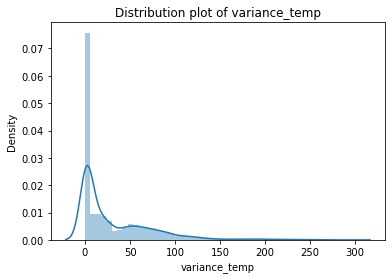

In [ ]:
# Distribution plot of variance of temperature
dist_plots(df_c, 'variance_temp')

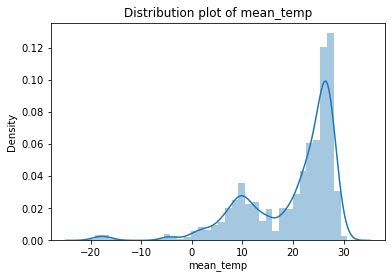

In [ ]:
# Distribution plot of mean temperature
dist_plots(df_c, 'mean_temp')

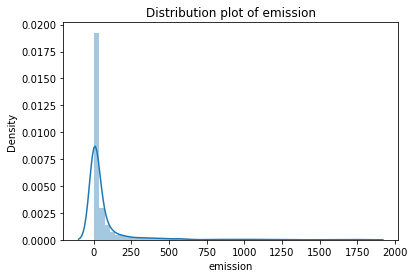

In [ ]:
# Distribution plot of emission
dist_plots(df_c, 'emission')

### Top 10 countries with high CO2 emission

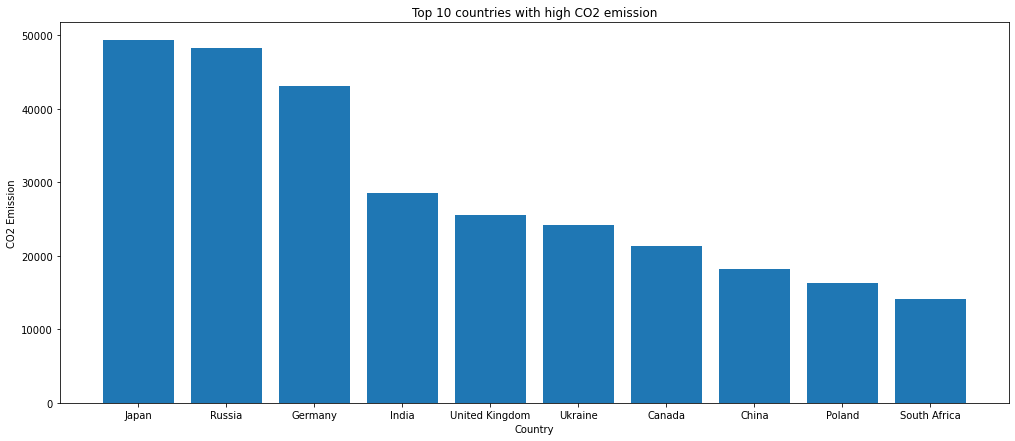

In [ ]:
# Creating a bar chart with top 10 countries with high co2 emissions
plt.figure(figsize = (17,7))
top_df_c = df_c.groupby('Country')['emission'].sum().reset_index()
top_10 = top_df_c.sort_values(by = 'emission', ascending = False)[0:10]
plt.bar(top_10['Country'], top_10['emission'])
plt.title('Top 10 countries with high CO2 emission')
plt.xlabel('Country')
plt.ylabel('CO2 Emission')
plt.show()

## Correlation Analysis

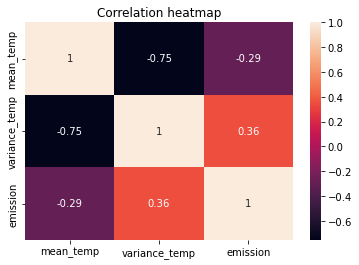

In [ ]:
# Creating a correlation heatmap
sns.heatmap(df_c[['mean_temp', 'variance_temp', 'emission']].corr(), annot = True)
plt.title('Correlation heatmap')
plt.show()


## Regression Analysis

In [ ]:
# Creating a function which performs regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def lin_reg(data, input_feat):
    x = data[input_feat].values.reshape(-1, 1)
    y = data['emission'].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)
    y_pred1 = regressor.predict(x)

    plt.scatter(x, y)
    plt.plot(x, y_pred1, color='red')
    plt.title(f'{input_feat} vs Emissions')
    plt.xlabel(f'{input_feat}')
    plt.ylabel('Emission')
    plt.show()

Mean Squared Error: 34361.89423839837
R-squared: 0.10754243999960422


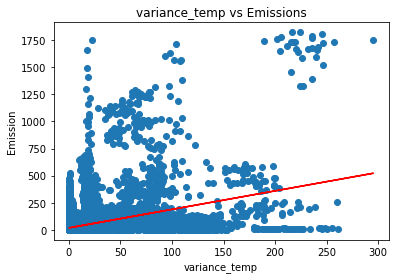

In [ ]:
# Regression analysis between CO2 emissions and Variance of temperature
lin_reg(df_c, 'variance_temp')

Mean Squared Error: 35538.60317115427
R-squared: 0.07698059798728352


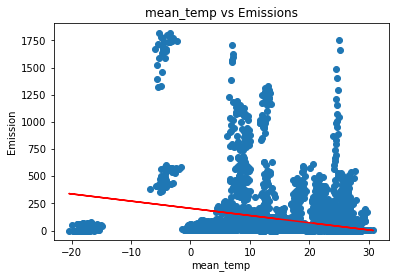

In [ ]:
# Regression analysis between CO2 emissions and mean temperature
lin_reg(df_c, 'mean_temp')

### Predicting the CO2 emissions for future years

In [ ]:
# Creating a dataframe of years and their total emissions
df_ts = df_c.groupby('year')['emission'].sum().reset_index()
df_ts

,year,emission
0,1970,9364.885108
1,1971,9428.869413
2,1972,9906.575269
3,1973,10588.072747
4,1974,10748.312454
5,1975,10993.691658
6,1976,11562.936428
7,1977,11957.581967
8,1978,12595.319291
9,1979,11195.747970


Mean Squared Error: 576491.0854831601
R-squared: 0.8417058390254051


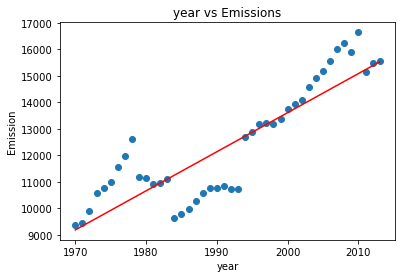

In [ ]:
# linear regression to predict future emissions
lin_reg(df_ts, 'year')

In [ ]:
# A dataframe contains prediction of emissions of future years
future = pd.DataFrame({'year' :list(range(2020, 2051))})
x = df_ts['year'].values.reshape(-1, 1)
y = df_ts['emission'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
mdl = LinearRegression()
mdl.fit(X_train, y_train)
future_pred = mdl.predict(future)
result = pd.DataFrame({
    'year': future['year'],
    'emission': future_pred
})
result

,year,emission
0,2020,16554.693711
1,2021,16702.074754
2,2022,16849.455797
3,2023,16996.836840
4,2024,17144.217883
5,2025,17291.598927
6,2026,17438.979970
7,2027,17586.361013
8,2028,17733.742056
9,2029,17881.123099


## Time series analysis

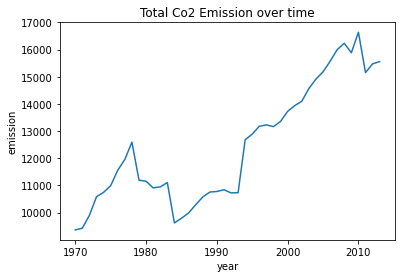

In [ ]:
# Creating a time series chart showing total CO2 emissions over time
df_c.groupby('year')['emission'].sum().plot()
plt.title('Total Co2 Emission over time')
plt.ylabel('emission')
plt.show()

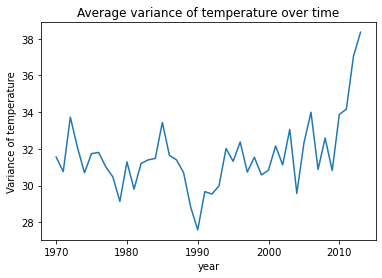

In [ ]:
# Creating a time series chart showing Variance of temperatures over time
df_c.groupby('year')['variance_temp'].mean().plot()
plt.title('Average variance of temperature over time')
plt.ylabel('Variance of temperature')
plt.show()

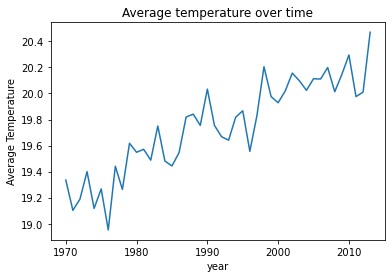

In [ ]:
# Creating a time series chart showing average temperature over time
df_c.groupby('year')['mean_temp'].mean().plot()
plt.title('Average temperature over time')
plt.ylabel('Average Temperature')
plt.show()

In [ ]:
df_c.to_csv('co2_data.csv')

## CO2 Emission Per Sector Analysis

In [ ]:
# creating a copy of data
df_cs = co2_by_sector_df.copy()

#### Removing outliers

In [ ]:
# Creating a for loop which identifies the index od outliers and create a list of outlier indexes
for i in num_feat:
  indeces_cs = []                                              # creating a empty list
  x = df_cs[i]
  mean = df_cs[i].mean()
  std = df_cs[i].std()
  index = df_cs[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces_cs.append(index)

In [ ]:
# Removing outliers
df_cs.drop(list(indeces_cs)[0] , inplace = True)

#### Average emissions per sector

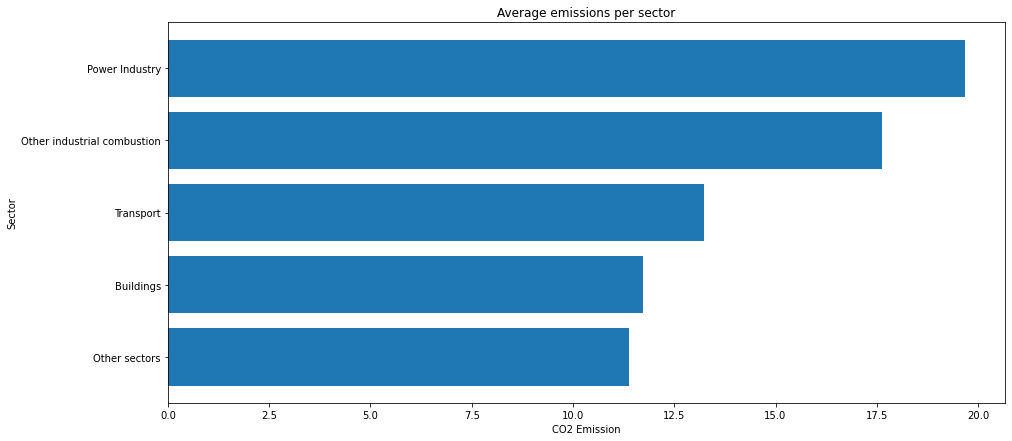

In [ ]:
# Creating a bar chart showing Average emissions sector wise
sec = df_cs.groupby('Sector')['emission'].mean().sort_values().reset_index()
plt.figure(figsize = (15,7))
plt.barh(sec['Sector'], sec['emission'])
plt.title('Average emissions per sector')
plt.xlabel('CO2 Emission')
plt.ylabel('Sector')
plt.show()

## CO2 emissions per captia analysis

In [ ]:
# Creating a copy of dataframe
df_cp = co2_per_captia_df.copy()

#### Removing outliers

In [ ]:
# Creating a for loop which identifies the index od outliers and create a list of outlier indexes
for i in num_feat:
  indeces_cp = []                                              # creating a empty list
  x = df_cp[i]
  mean = df_cp[i].mean()
  std = df_cp[i].std()
  index = df_cp[(np.abs(x)) - (mean) >= (3 * std)].index     # getting the index of outlier
  indeces_cp.append(index)

In [ ]:
# Removing outliers
df_cp.drop(list(indeces_cp)[0] , inplace = True)

#### Top 10 countries with high emissions per captia

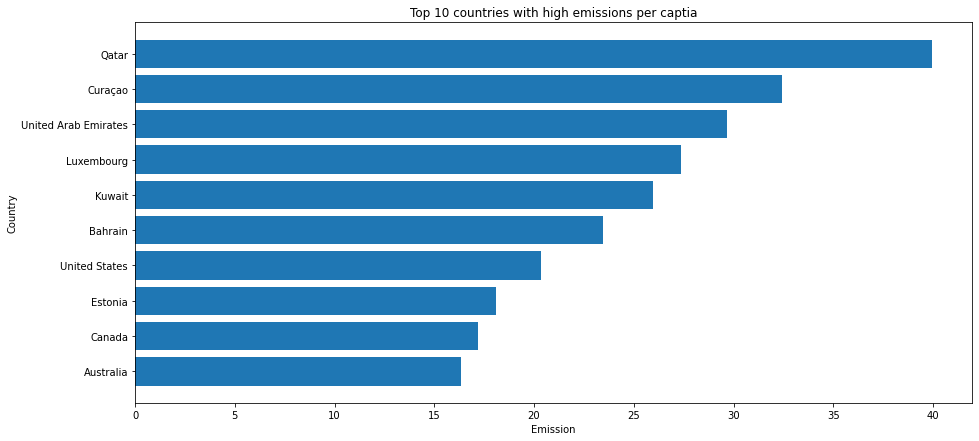

In [ ]:
# Creating a bar chart showing the top 10 countries with high co2 emissions per captia
per_captia = df_cp.groupby('Country')['emission'].mean().reset_index().sort_values(by = 'emission', ascending = False)[0:10]
plt.figure(figsize = (15,7))
plt.barh(per_captia['Country'][::-1], per_captia['emission'][::-1])
plt.title('Top 10 countries with high emissions per captia')
plt.xlabel('CO2 Emission per captia')
plt.ylabel('Country')
plt.show()

#### Correlation between CO2 emissions per captia and temperature variables

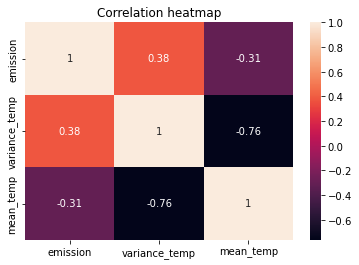

In [ ]:
# Creating a correlation heatmap
sns.heatmap(df_cp[['emission', 'variance_temp', 'mean_temp']].corr(), annot = True)
plt.title('Correlation heatmap')
plt.show()

### Total Green House Gases emission analysis


In [ ]:
# Creating a copy of dataframe
ghg_df = ghg_total_df.copy()

In [ ]:
# Descriptive Statistics of green house gases emission
desc_stats(ghg_df, 'emission')

Descriptive Statistics of emission


,index,emission
0,count,7568.000000
1,mean,181.221937
2,std,719.249990
3,min,0.003847
4,25%,4.943478
5,50%,22.674108
6,75%,86.397379
7,max,13222.846036


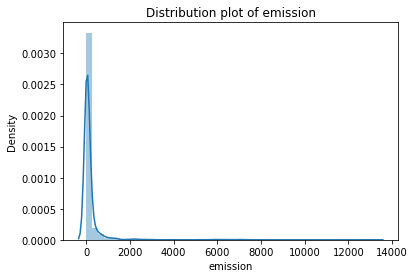

In [ ]:
# Distribution plot of green house gases emission
dist_plots(ghg_df, 'emission')

### Top 10 countries with high Green House Gases emissions

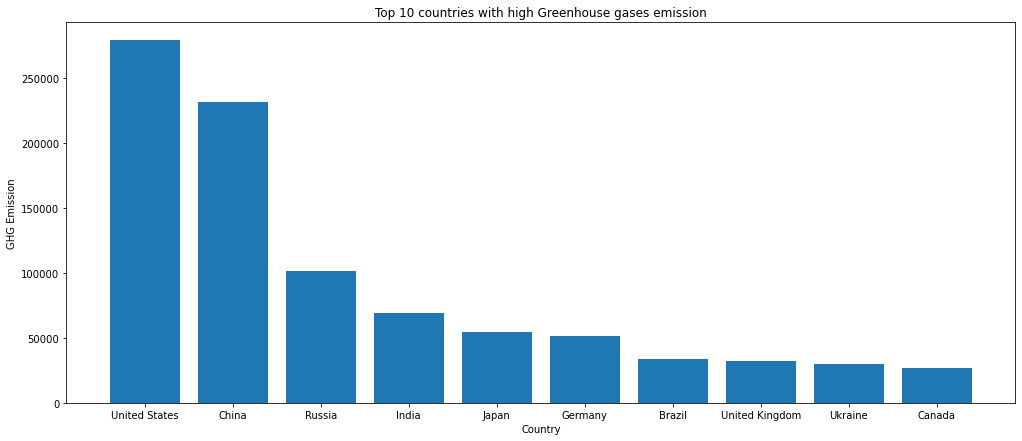

In [ ]:
# Creating a bar chart showing top 10 countries with high green house gases emissions
plt.figure(figsize = (17,7))
top_df_g = ghg_df.groupby('Country')['emission'].sum().reset_index()
top_10_g = top_df_g.sort_values(by = 'emission', ascending = False)[0:10]
plt.bar(top_10_g['Country'], top_10_g['emission'])
plt.title('Top 10 countries with high Greenhouse gases emission')
plt.xlabel('Country')
plt.ylabel('GHG Emission')
plt.show()

## Correlation Analysis

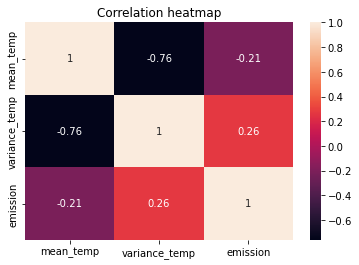

In [ ]:
# Correlation analysis
sns.heatmap(ghg_df[['mean_temp', 'variance_temp', 'emission']].corr(), annot = True)
plt.title('Correlation heatmap')
plt.show()

## Regression Analysis

In [ ]:
# Creating a function which performs regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def lin_reg(data, input_feat):
    x = data[input_feat].values.reshape(-1, 1)
    y = data['emission'].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)
    y_pred1 = regressor.predict(x)

    plt.scatter(x, y)
    plt.plot(x, y_pred1, color='red')
    plt.title(f'{input_feat} vs GHG Emission')
    plt.xlabel(f'{input_feat}')
    plt.ylabel('GHG Emission')
    plt.show()

Mean Squared Error: 365326.92547140154
R-squared: 0.0815508951389412


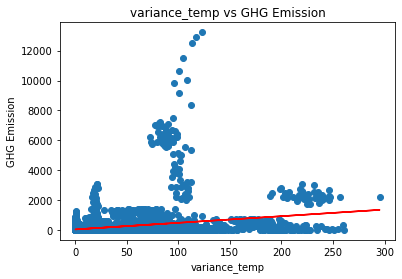

In [ ]:
# Regression analysis between variance of temperature and green house gases emissions
lin_reg(ghg_df, 'variance_temp')

Mean Squared Error: 379627.3876834972
R-squared: 0.04559885929912222


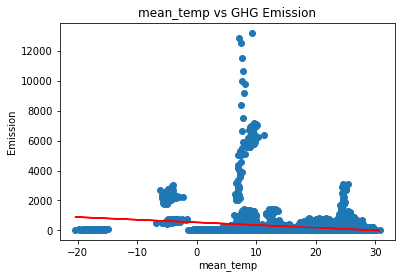

In [ ]:
# Regression analysis between average temperature and green house gas emissions
lin_reg(ghg_df, 'mean_temp')

### Predicting future green house gases emissions

In [ ]:
# Creating a dataframe of years and their total ghg emissions
df_ghg_ts = ghg_df.groupby('year')['emission'].sum().reset_index()
df_ghg_ts

,year,emission
0,1970,21295.685950
1,1971,21326.261867
2,1972,22166.971420
3,1973,23229.309909
4,1974,23311.165332
5,1975,23423.593165
6,1976,24454.213938
7,1977,25117.997508
8,1978,25831.149971
9,1979,26464.930449


Mean Squared Error: 2590541.7585622123
R-squared: 0.9247331723617214


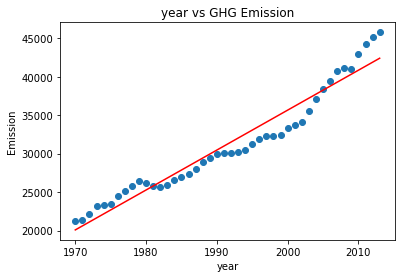

In [ ]:
# linear regression to predict future ghg emissions
lin_reg(df_ghg_ts, 'year')

In [ ]:
# A dataframe contains prediction of emissions of future years
x1 = df_ghg_ts['year'].values.reshape(-1, 1)
y1 = df_ghg_ts['emission'].values
mdl = LinearRegression()
mdl.fit(x1, y1)

future_ghg = pd.DataFrame({'year' :list(range(2020, 2051))})
future_ghg_pred = mdl.predict(future_ghg)
result_ghg = pd.DataFrame({
    'year': future_ghg['year'],
    'emission': future_ghg_pred
})
result_ghg

,year,emission
0,2020,45822.955637
1,2021,46337.088357
2,2022,46851.221077
3,2023,47365.353797
4,2024,47879.486517
5,2025,48393.619237
6,2026,48907.751957
7,2027,49421.884677
8,2028,49936.017397
9,2029,50450.150116


## Time series analysis

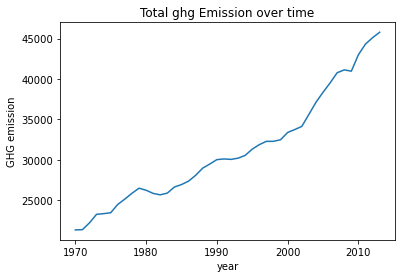

In [ ]:
# Creating a time series chart showing total ghg emissions over time
ghg_df.groupby('year')['emission'].sum().plot()
plt.title('Total ghg Emission over time')
plt.ylabel('GHG emission')
plt.show()

## Total Green House Gases Emission per sector Analysis

In [ ]:
# Creating copy of dataframe
ghg_s = ghg_per_sec_df.copy()

#### Average emissions per sector

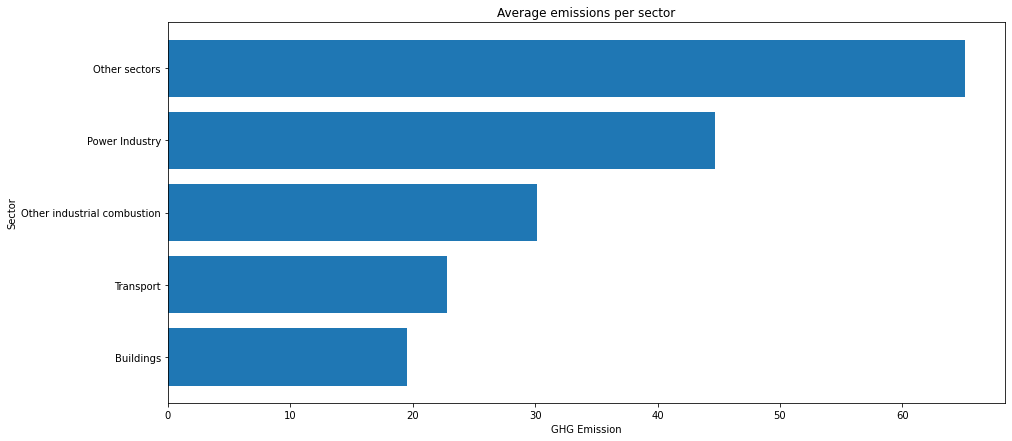

In [ ]:
# Creating a bar chart showing Average ghg emissions sector wise
sec = ghg_s.groupby('Sector')['emission'].mean().sort_values().reset_index()
plt.figure(figsize = (15,7))
plt.barh(sec['Sector'], sec['emission'])
plt.title('Average emissions per sector')
plt.xlabel('GHG Emission')
plt.ylabel('Sector')
plt.show()

## GHG emissions per captia analysis

In [ ]:
# Creating a copy of dataframe
ghg_cp = ghg_per_captia_df.copy()

#### Top 10 countries with high ghg emissions per captia

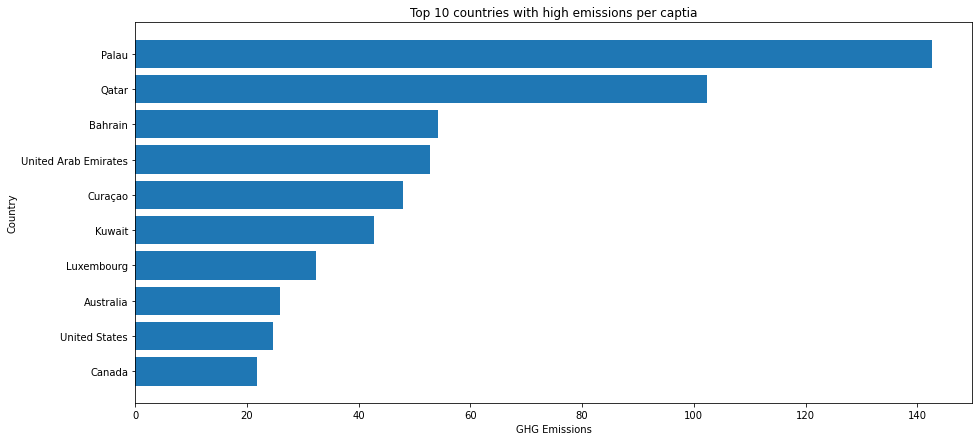

In [ ]:
# Creating a bar chart showing top 10 countries with high ghg emissions per captia
per_captia = ghg_cp.groupby('Country')['emission'].mean().reset_index().sort_values(by = 'emission', ascending = False)[0:10]
plt.figure(figsize = (15,7))
plt.barh(per_captia['Country'][::-1], per_captia['emission'][::-1])
plt.title('Top 10 countries with high emissions per captia')
plt.xlabel('GHG Emissions')
plt.ylabel('Country')
plt.show()

#### Correlation between CO2 emissions per captia and temperature variables

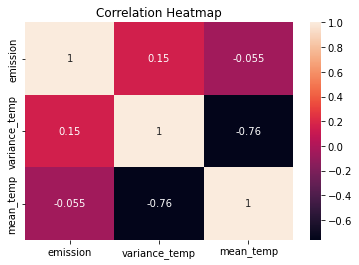

In [ ]:
# Correlation analysis
sns.heatmap(ghg_cp[['emission', 'variance_temp', 'mean_temp']].corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()